In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode=checks

Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (A100-SXM4-40GB, 40536MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 23.0/166.8 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="R9DhSFSIGg7tTqEsEQld")
project = rf.workspace("deep-hbapi").project("tennis-yfcgx")
dataset = project.version(1).download("yolov5")


/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 19.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=a7132434320833197039c74d46a027f335baf42bf81d9f7071d9b1bd9174d6d4
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    U

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Tennis-1 in yolov5pytorch:: 100%|██████████| 6810/6810 [00:01<00:00, 4500.88it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=50 imgsz=800

/content
100% 22.8M/22.8M [00:02<00:00, 10.3MB/s]

Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (A100-SXM4-40GB, 40536MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/Tennis-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					    train_batch0.jpg
BoxF1_curve.png					    train_batch1.jpg
BoxP_curve.png					    train_batch2.jpg
BoxPR_curve.png					    train_batch6960.jpg
BoxR_curve.png					    train_batch6961.jpg
confusion_matrix.png				    train_batch6962.jpg
events.out.tfevents.1673920594.a7e1f3fa92ea.4790.0  val_batch0_labels.jpg
MaskF1_curve.png				    val_batch0_pred.jpg
MaskP_curve.png					    val_batch1_labels.jpg
MaskPR_curve.png				    val_batch1_pred.jpg
MaskR_curve.png					    val_batch2_labels.jpg
predictions.json				    val_batch2_pred.jpg
results.csv					    weights
results.png


/content


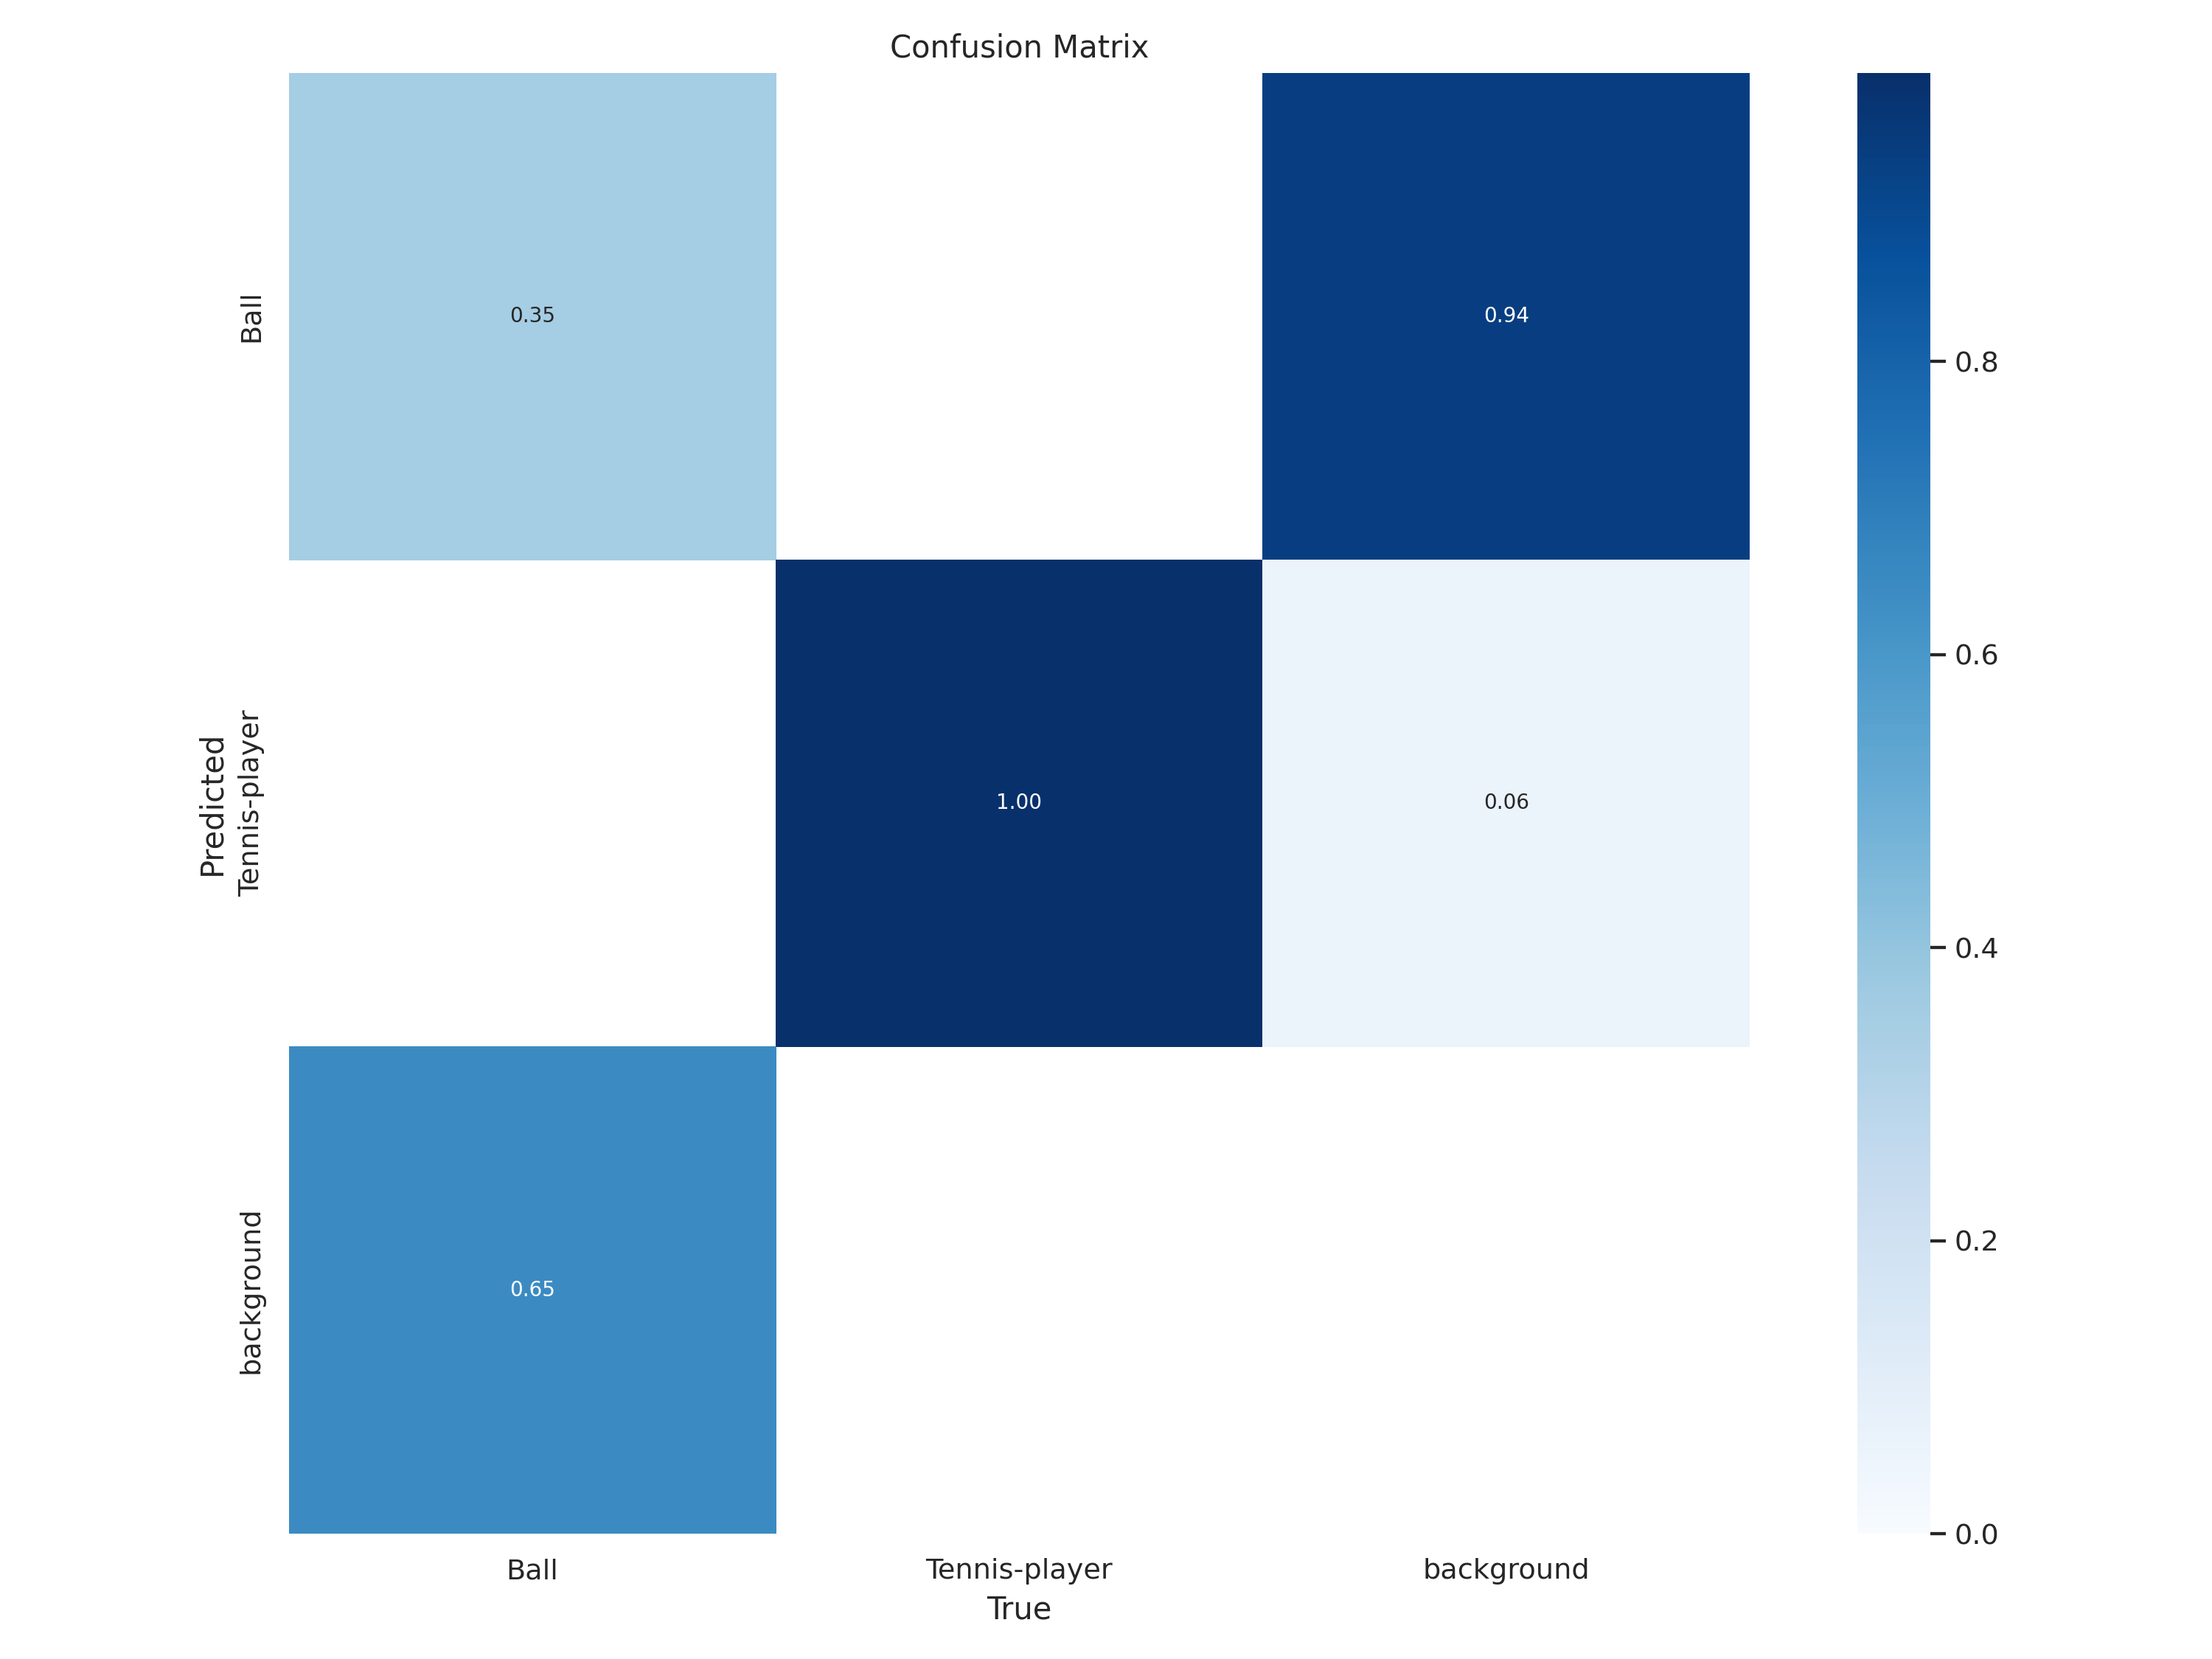

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


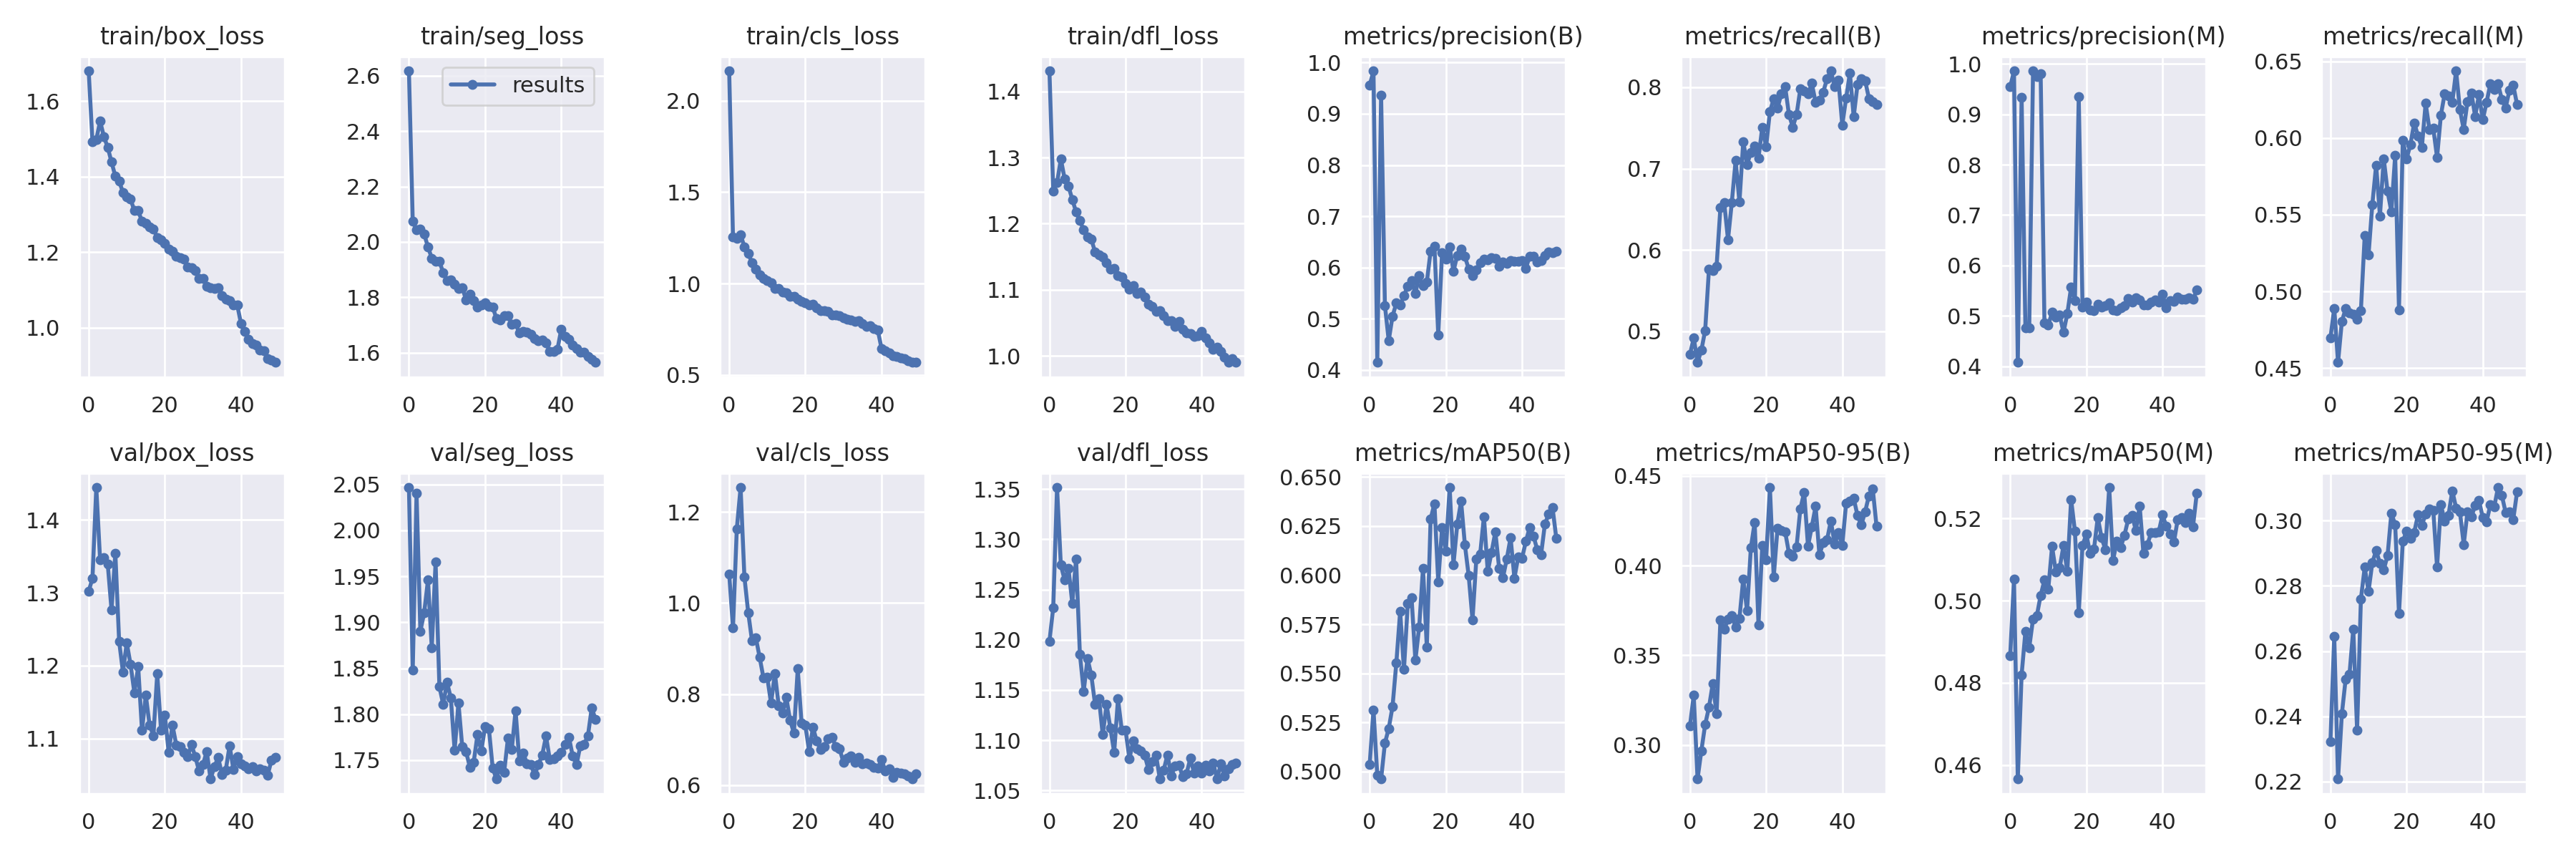

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


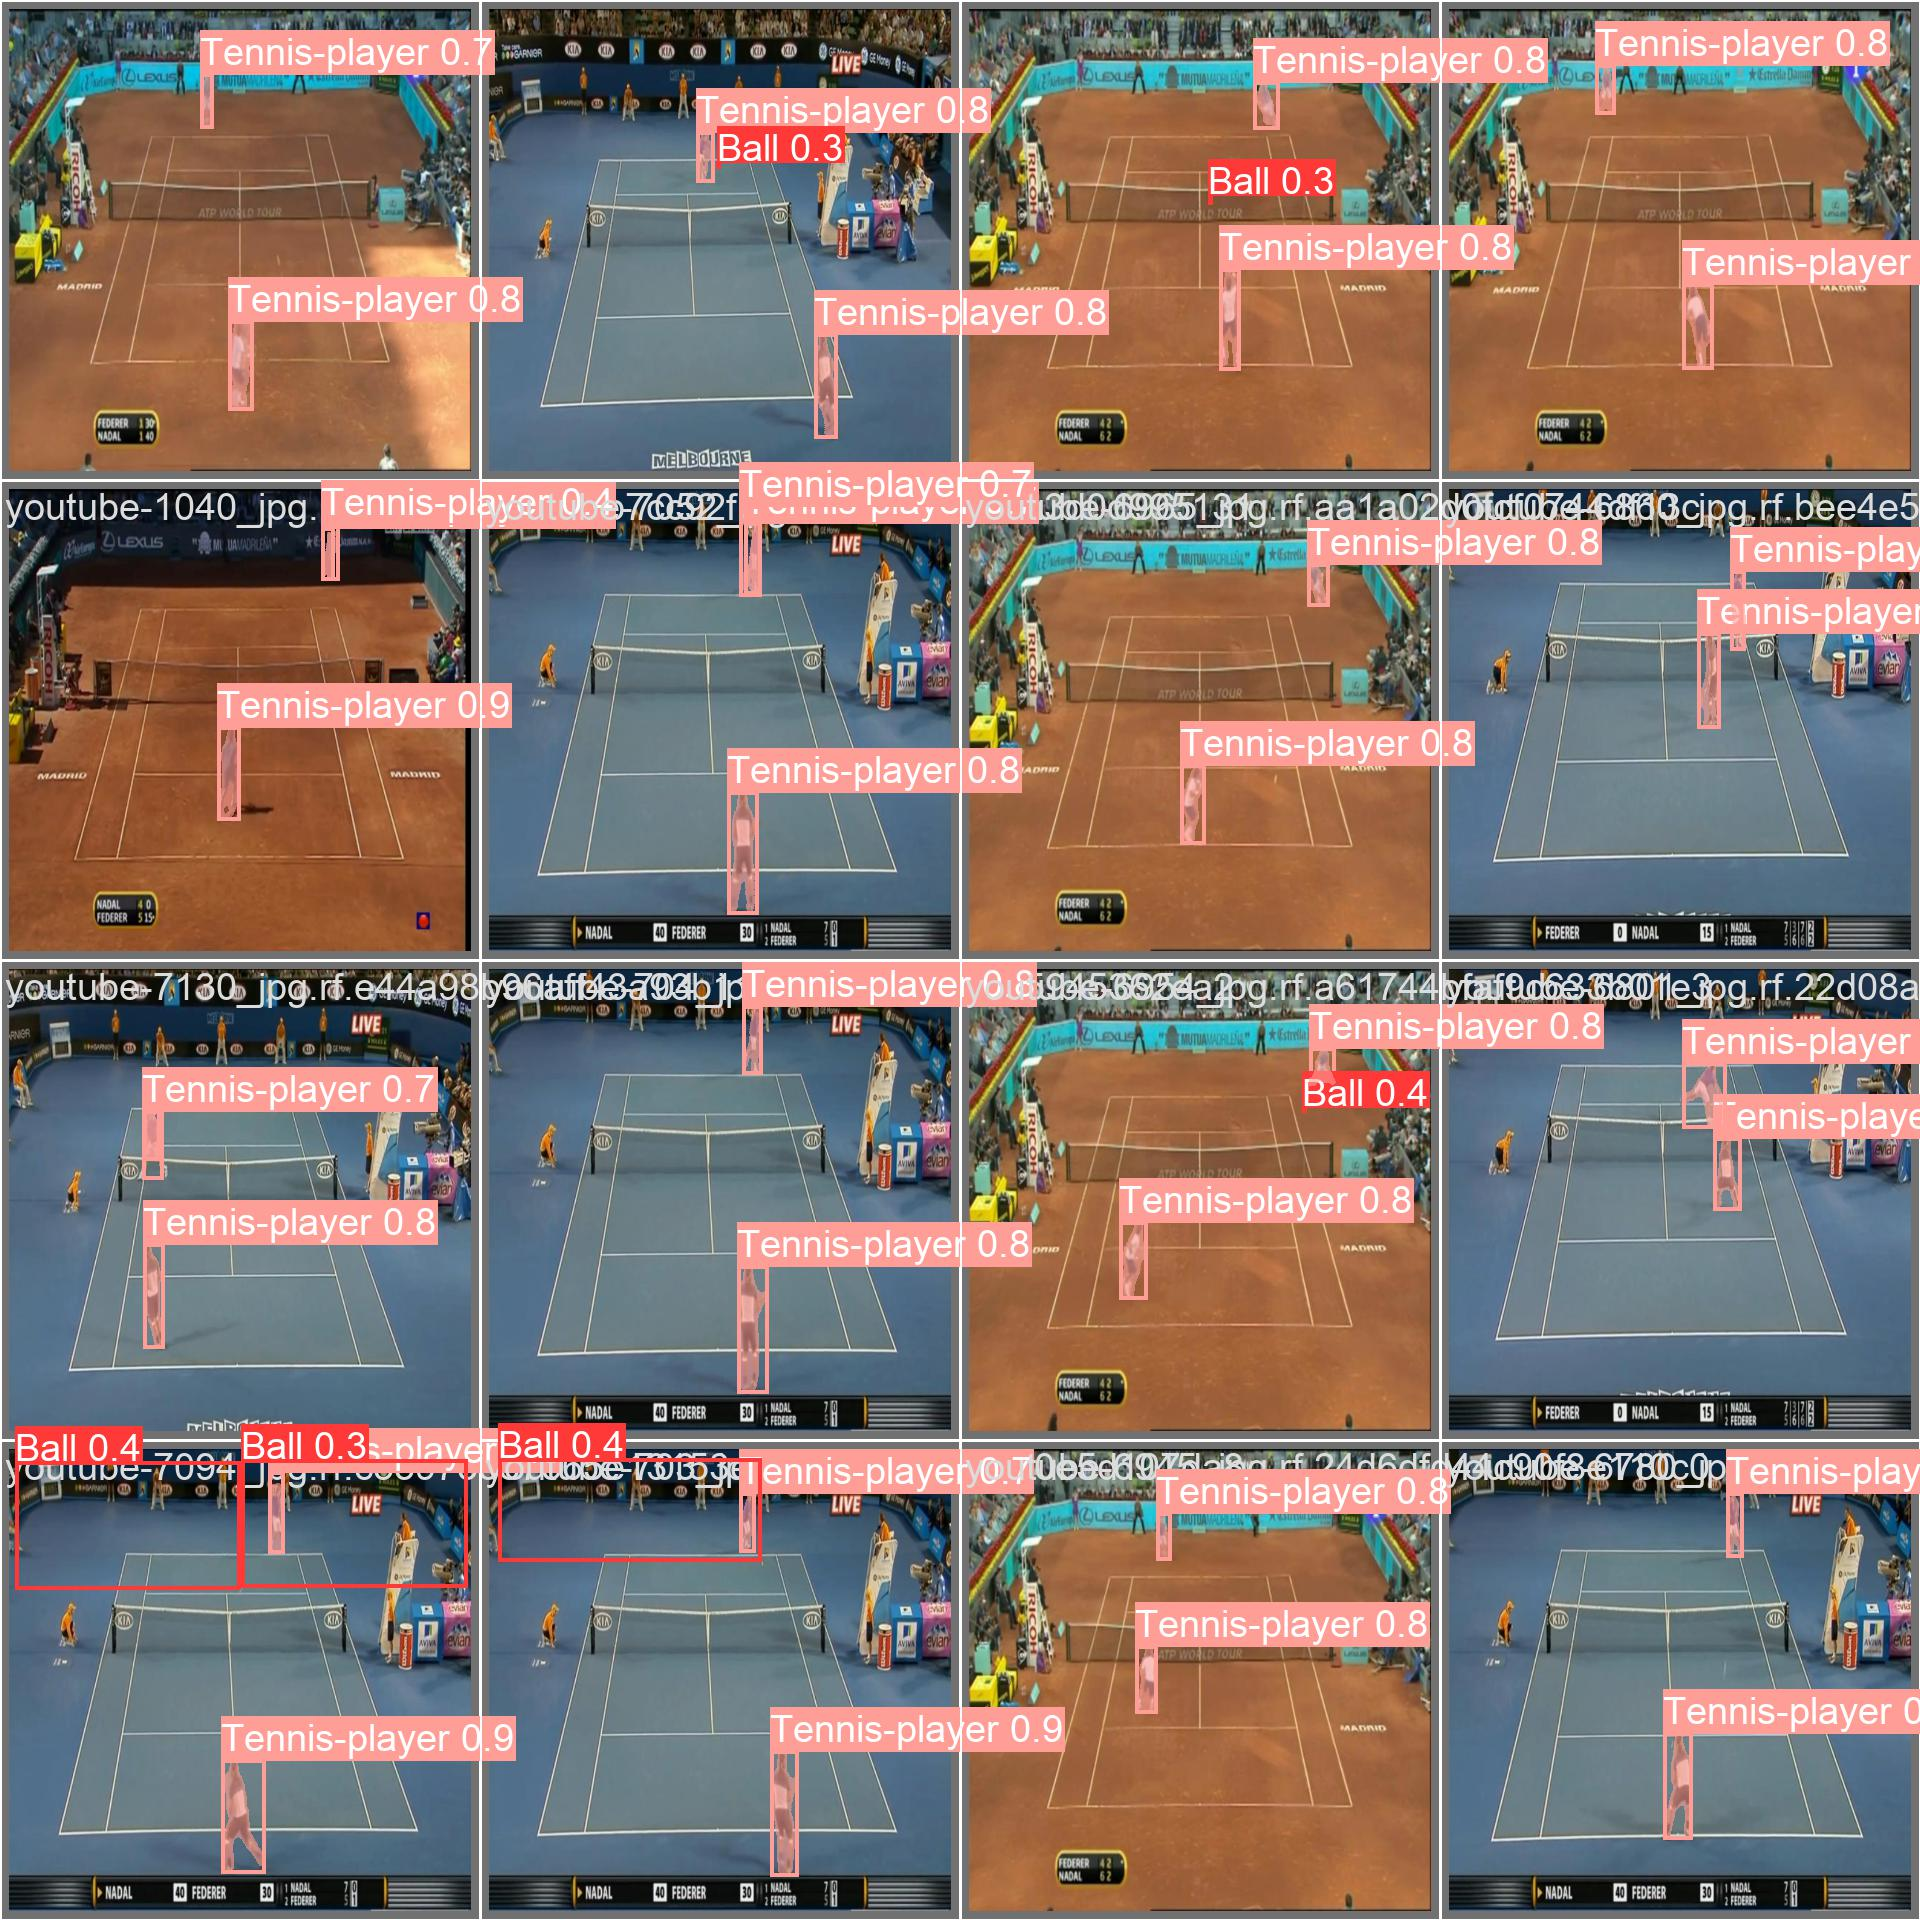

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (A100-SXM4-40GB, 40536MiB)
Fusing layers... 
YOLOv8s-seg summary: 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/Tennis-1/valid/labels.cache... 318 images, 0 backgrounds, 0 corrupt: 100% 318/318 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 20/20 [00:07<00:00,  2.72it/s]
                   all        318        873      0.624      0.753      0.611      0.426      0.531      0.612      0.515        0.3
                  Ball        318        236      0.263      0.513      0.231      0.146     0.0819      0.229     0.0399     0.0166
         Tennis-player        318        637      0.984      0.994      0.992      0.706       0.98      0.995      0.991      0.584
Speed: 0.6ms pre-process, 2.0ms inference, 0.0ms loss, 1.2ms post-process per image


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (A100-SXM4-40GB, 40536MiB)
Fusing layers... 
YOLOv8s-seg summary: 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs
image 1/300 /content/datasets/Tennis-1/test/images/youtube-1020_jpg.rf.1d0566cd7c0b71440c7eeb623d5af6a9.jpg: 640x640 1 Ball, 2 Tennis-players, 13.2ms
image 2/300 /content/datasets/Tennis-1/test/images/youtube-107_jpg.rf.7479cad5092537f45b34de49d01e135c.jpg: 640x640 2 Tennis-players, 13.9ms
image 3/300 /content/datasets/Tennis-1/test/images/youtube-1084_jpg.rf.4c2ac4612d4aff0adb2bbd0483a7f13a.jpg: 640x640 1 Ball, 2 Tennis-players, 13.5ms
image 4/300 /content/datasets/Tennis-1/test/images/youtube-1088_jpg.rf.856a8a54f8d3d855899ad1315db54bb1.jpg: 640x640 2 Tennis-players, 13.9ms
image 5/300 /content/datasets/Tennis-1/test/images/youtube-1111_jpg.rf.6b002f450c6a2a3fa67e8097dcb28b7c.jpg: 640x640 2 Tennis-players, 13.4ms
image 6/300 /content/datasets/Tennis-1/test/images/youtube-1137_jpg.rf.8b41fd

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:50]:
      display(Image(filename=image_path, height=600))
      print("\n")

Output hidden; open in https://colab.research.google.com to view.